In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
# Linear Model
def lm (X,Y):
    # Calculating Mean
    Xmean = sum(X) / len(X)
    Ymean = sum(Y) / len(Y)
    
    # Calculating Variance
    Xvar = sum([(i-Xmean)**2 for i in X])
    Yvar = sum([(i-Ymean)**2 for i in Y])
    
    # Calculate Covariance
    cov = 0.0
    for i,j in zip(X,Y): cov += (i-Xmean)*(j-Ymean)
    
    a = cov / Xvar
    b = Ymean - a * Xmean
    
    return (a, b)

# Predict function for Linear Model
def predLM(a,b, xval):
    return a*xval+b

In [3]:
# correlation coefficient
# combinedVariance(x,y) / (sd(x) * sd(y))
def corrCoef(x,y):
    meanX = sum(x) / len(x)
    meanY = sum(y) / len(y)
    
    # Covariance
    cov = 0.0
    for i,j in zip(x,y): cov += (i-meanX)*(j-meanY)
    
    # Standard Deviation X
    sdX = math.sqrt( sum([(i-meanX)**2 for i in x]) )    
    # Standard Deviation Y
    sdY = math.sqrt( sum([(i-meanY)**2 for i in y]) )
    
    return cov / (sdX*sdY)

# R SQUARE, takes 1 argument as correlation coefficient of x and y
rSqr = lambda c : (c**2) * 100

In [4]:
# Sum of Squared Errors
def sse(a,b,x,y):
    predictions = [predLM(a,b,i) for i in x]
    error = [i-j for i,j in zip(y,predictions)]
    return sum([i**2 for i in error])

In [5]:
# Dataset
x = [ 2,  3,  4,  6,  9, 13, 18]
y = [ 3,  6,  5,  8, 13, 15, 19]

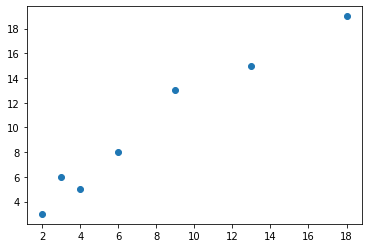

In [6]:
# Visulizing Dataset
plt.scatter(x,y)
plt.show()

In [7]:
# Calculating a and b
a,b = lm(x,y)

# Calculatinf Correlation Coefficient
cc = corrCoef(x,y)

# calculating R-SQUARE
rs = rSqr(cc)

print(f"a = {a} \nb = {b}")
print(f"Correlation Coefficient = {cc}")
print(f"R-Square = {rs}")
print(f"SSE = {sse(a,b,x,y)}")

a = 0.9854972375690608 
b = 2.113950276243094
Correlation Coefficient = 0.9807673640790555
R-Square = 96.19046224425787
SSE = 7.956491712707178


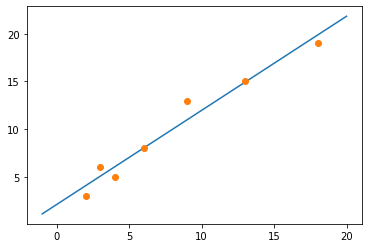

In [8]:
# Plotting Regression Line
x1, y1 = -1, predLM(a,b, -1)
x2, y2 = 20, predLM(a,b, 20)
plt.plot([x1, x2], [y1, y2], x, y, "o")
plt.show()